In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from xgboost import DMatrix, cv, train
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Bank Data/bank/bank-full.csv', sep=';')
df = data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [7]:
df['age'].value_counts()


,count
age,
32,2085
31,1996
33,1972
34,1930
35,1894
...,...
93,2
90,2
95,2


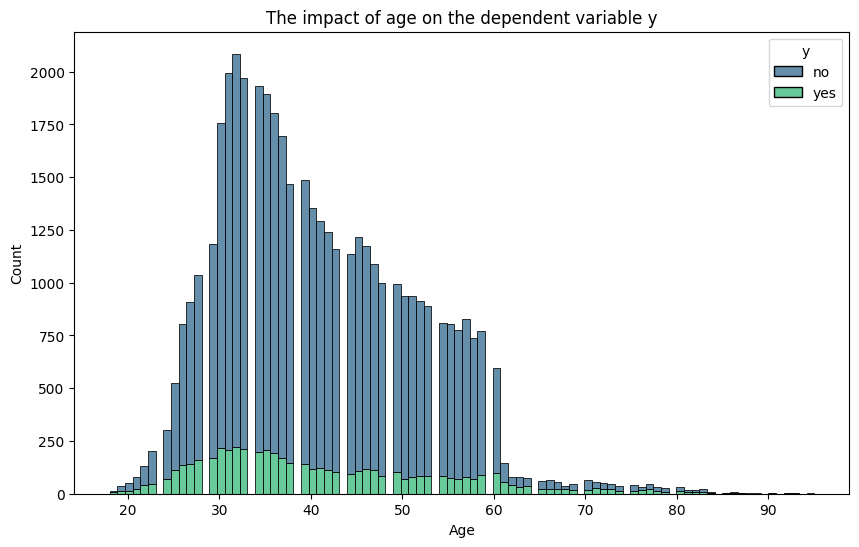

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='y', multiple='stack', palette='viridis')
plt.title('The impact of age on the dependent variable y')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

In [9]:
df['job'].value_counts()

,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


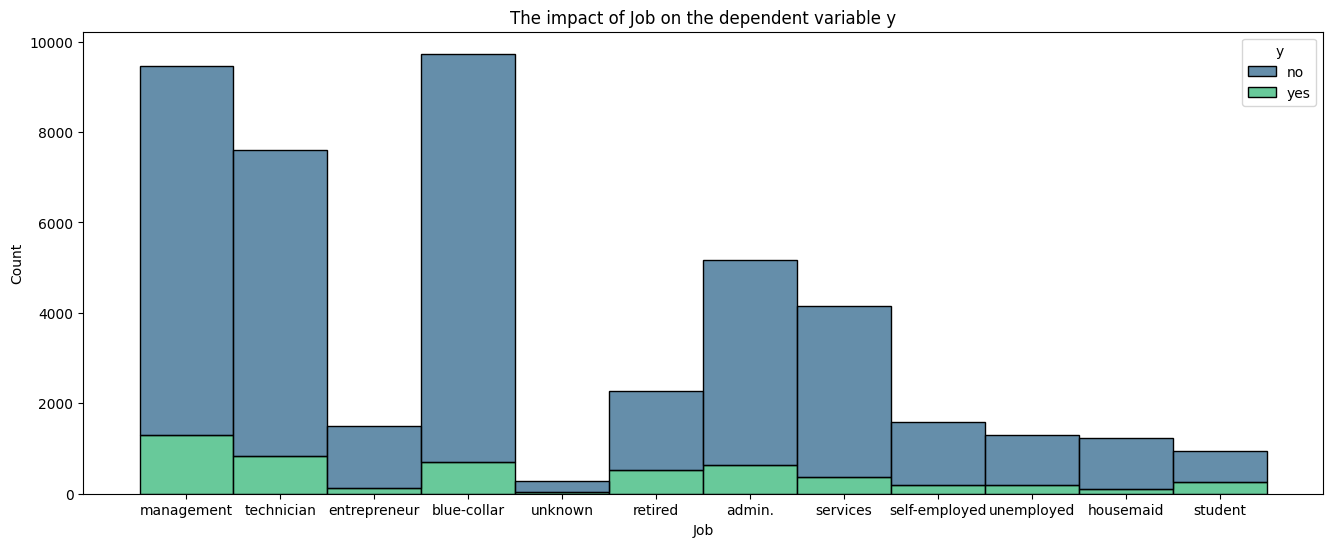

In [10]:
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='job', hue='y', multiple='stack', palette='viridis')
plt.title('The impact of Job on the dependent variable y')
plt.xlabel('Job')
plt.ylabel('Count')

plt.show()

In [11]:
df['education'].value_counts()

,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


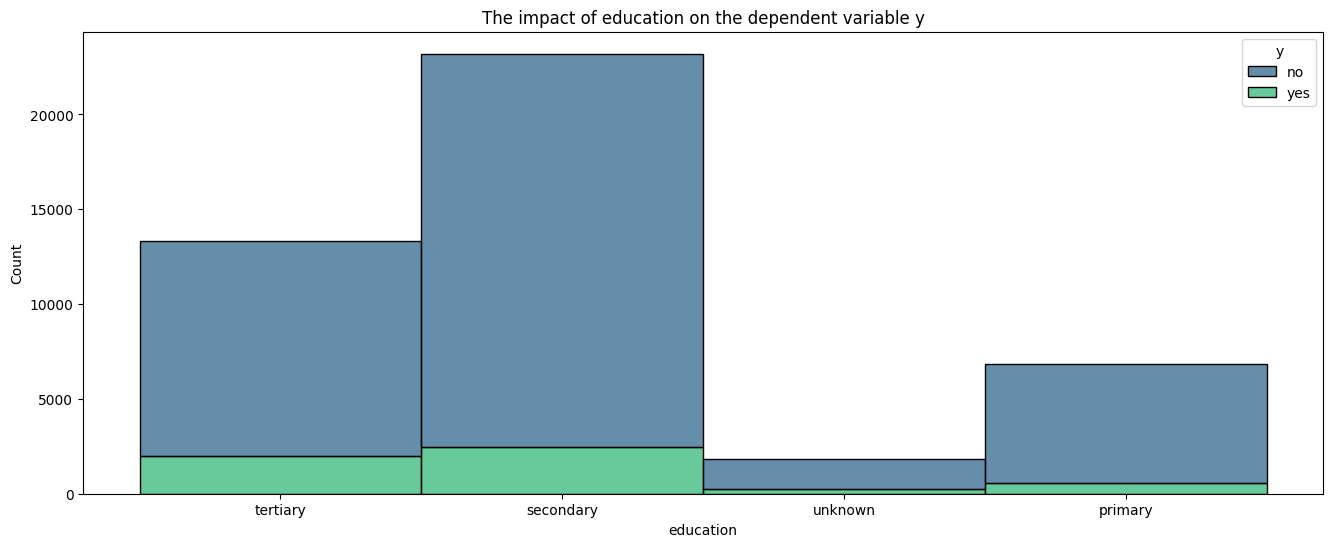

In [12]:
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='education', hue='y', multiple='stack', palette='viridis')
plt.title('The impact of education on the dependent variable y')
plt.xlabel('education')
plt.ylabel('Count')

plt.show()

In [13]:
df['marital'].value_counts()

,count
marital,
married,27214
single,12790
divorced,5207


Text(0, 0.5, 'Count')

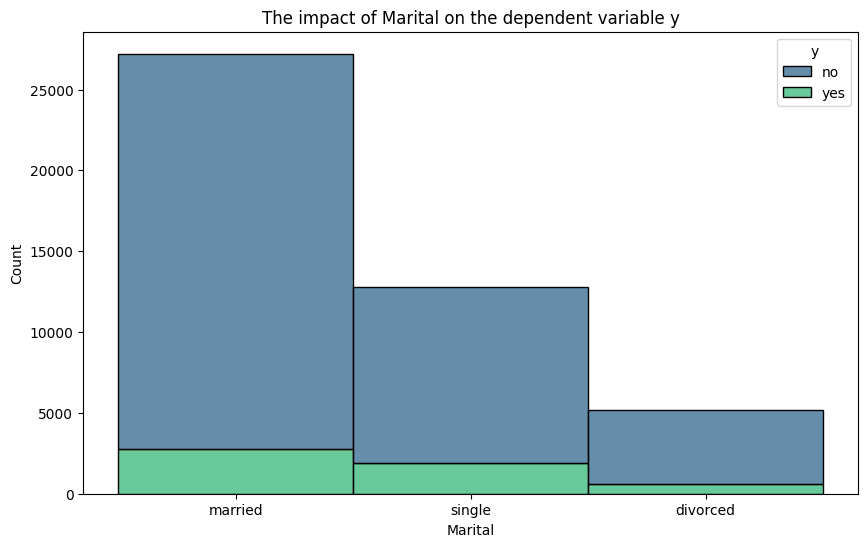

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='marital', hue='y', multiple='stack', palette='viridis')

plt.title('The impact of Marital on the dependent variable y')
plt.xlabel('Marital')
plt.ylabel('Count')

In [15]:
df['default'].value_counts()


,count
default,
no,44396
yes,815


Text(0, 0.5, 'Count')

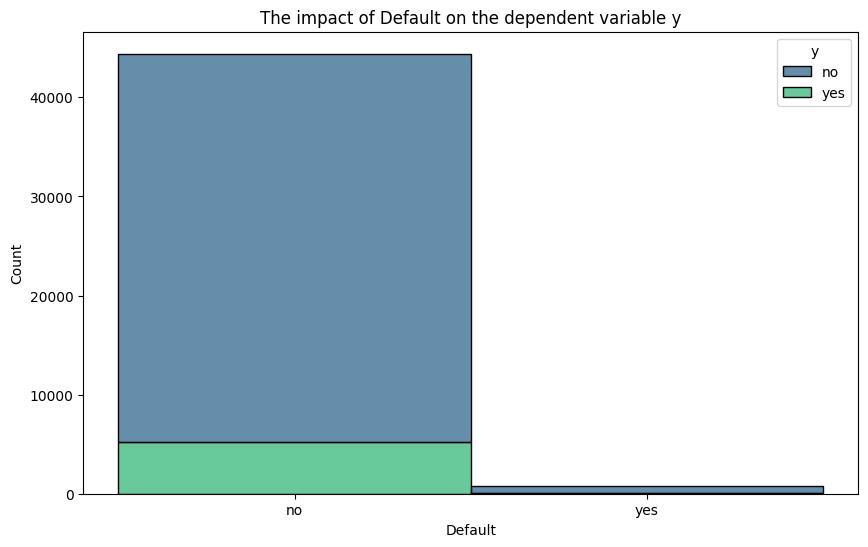

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='default', hue='y', multiple='stack', palette='viridis')
plt.title('The impact of Default on the dependent variable y')
plt.xlabel('Default')
plt.ylabel('Count')

In [17]:
df['balance'].value_counts()


,count
balance,
0,3514
1,195
2,156
4,139
3,134
...,...
-381,1
4617,1
20584,1


In [18]:
df['housing'].value_counts()

,count
housing,
yes,25130
no,20081


Text(0, 0.5, 'Count')

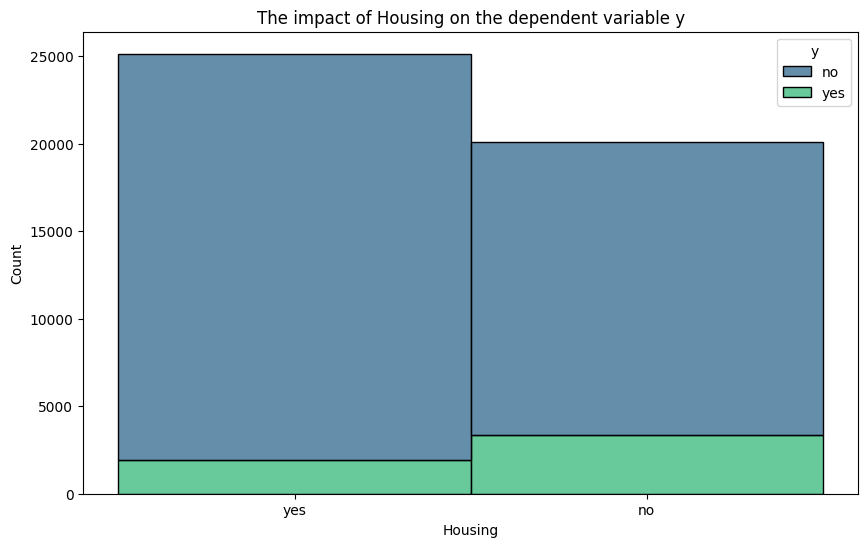

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='housing', hue='y', multiple='stack', palette='viridis')
plt.title('The impact of Housing on the dependent variable y')
plt.xlabel('Housing')
plt.ylabel('Count')

In [20]:
df['loan'].value_counts()

,count
loan,
no,37967
yes,7244


Text(0, 0.5, 'Count')

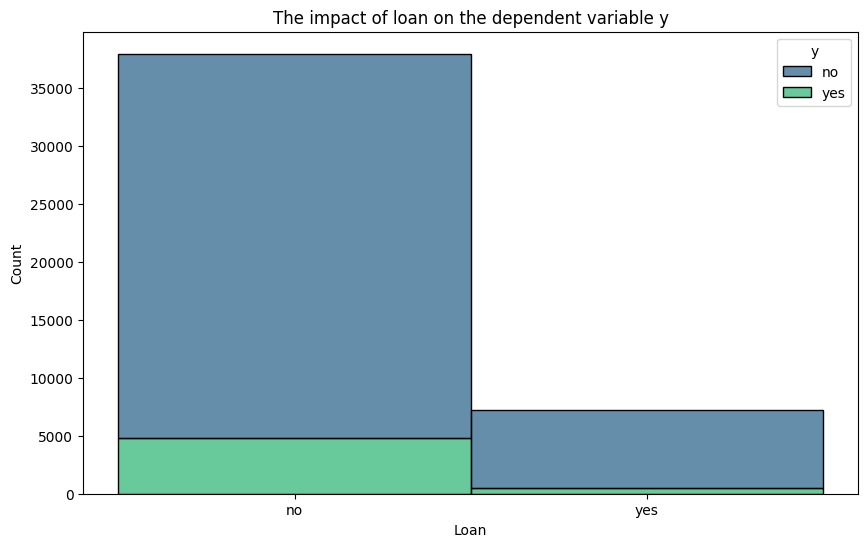

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loan', hue='y', multiple='stack', palette='viridis')
plt.title('The impact of loan on the dependent variable y')
plt.xlabel('Loan')
plt.ylabel('Count')

In [22]:
df['contact'].value_counts()

,count
contact,
cellular,29285
unknown,13020
telephone,2906


Text(0, 0.5, 'Count')

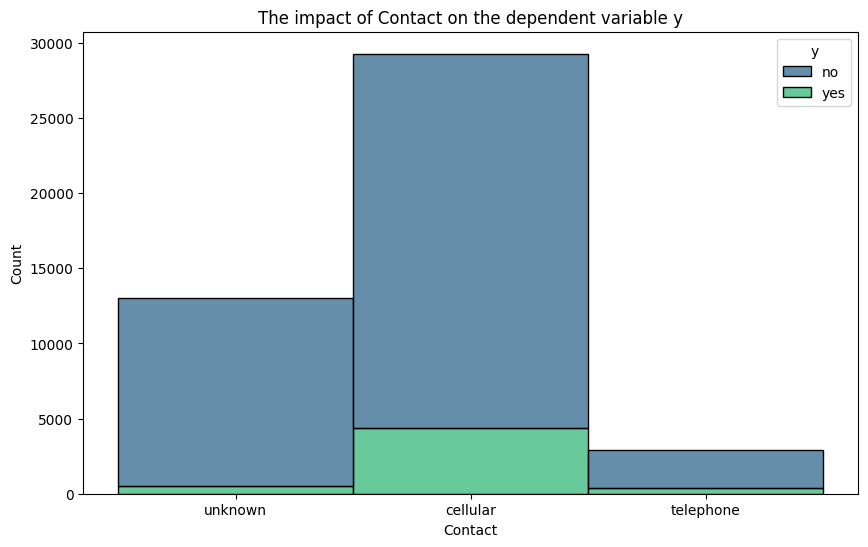

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='contact', hue='y', multiple='stack', palette='viridis')
plt.title('The impact of Contact on the dependent variable y')
plt.xlabel('Contact')
plt.ylabel('Count')

In [24]:
df['day'].value_counts()

,count
day,
20,2752
18,2308
21,2026
17,1939
6,1932
5,1910
14,1848
8,1842
28,1830


Text(0, 0.5, 'Count')

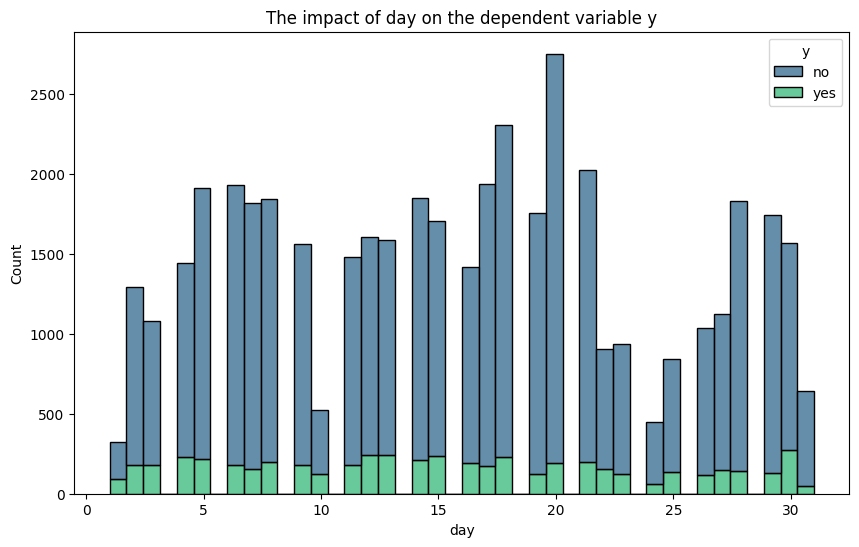

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='day', hue='y', multiple='stack', palette='viridis')
plt.title('The impact of day on the dependent variable y')
plt.xlabel('day')
plt.ylabel('Count')

In [26]:
df['month'].value_counts()

,count
month,
may,13766
jul,6895
aug,6247
jun,5341
nov,3970
apr,2932
feb,2649
jan,1403
oct,738


Text(0, 0.5, 'Count')

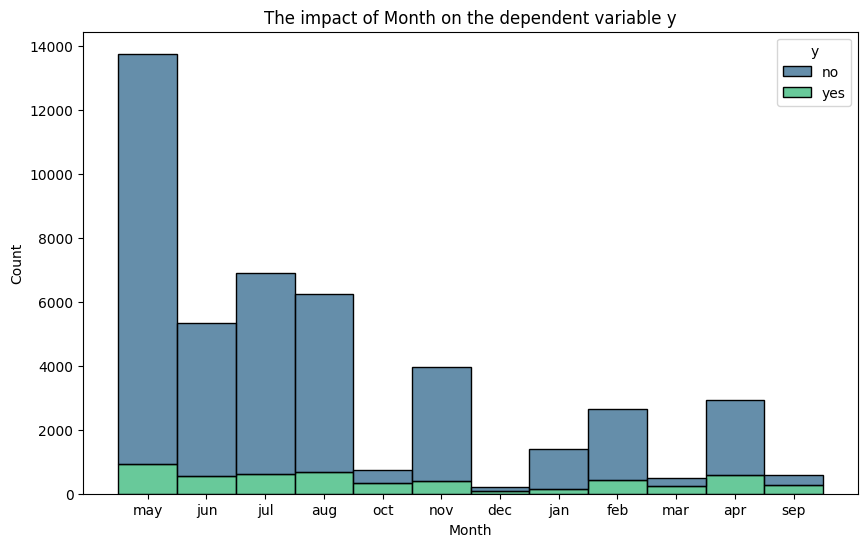

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='month', hue='y', multiple='stack', palette='viridis')

# Başlık ve etiketler
plt.title('The impact of Month on the dependent variable y')
plt.xlabel('Month')
plt.ylabel('Count')

In [28]:
df['duration'].value_counts()

,count
duration,
124,188
90,184
89,177
104,175
122,175
...,...
1833,1
1545,1
1352,1


Text(0, 0.5, 'Count')

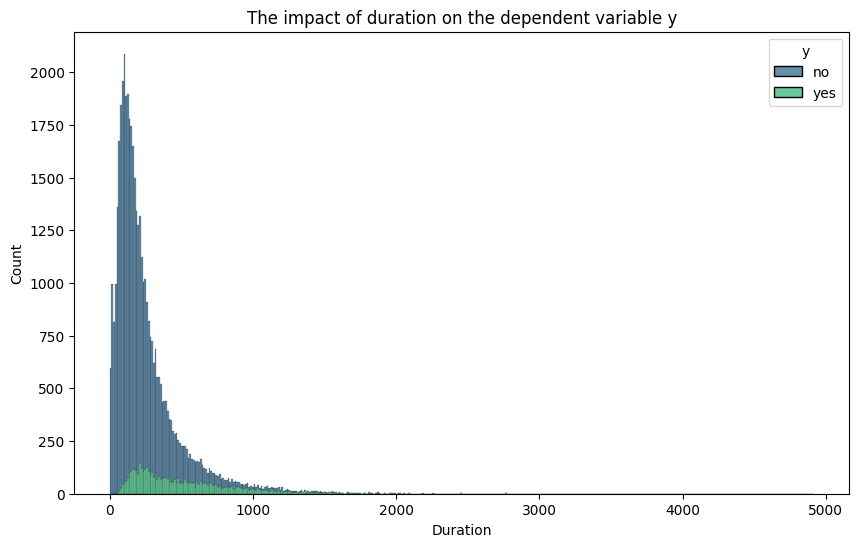

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='duration', hue='y', multiple='stack', palette='viridis')
plt.title('The impact of duration on the dependent variable y')
plt.xlabel('Duration')
plt.ylabel('Count')

In [30]:
df['campaign'].value_counts()

,count
campaign,
1,17544
2,12505
3,5521
4,3522
5,1764
6,1291
7,735
8,540
9,327


Text(0, 0.5, 'Count')

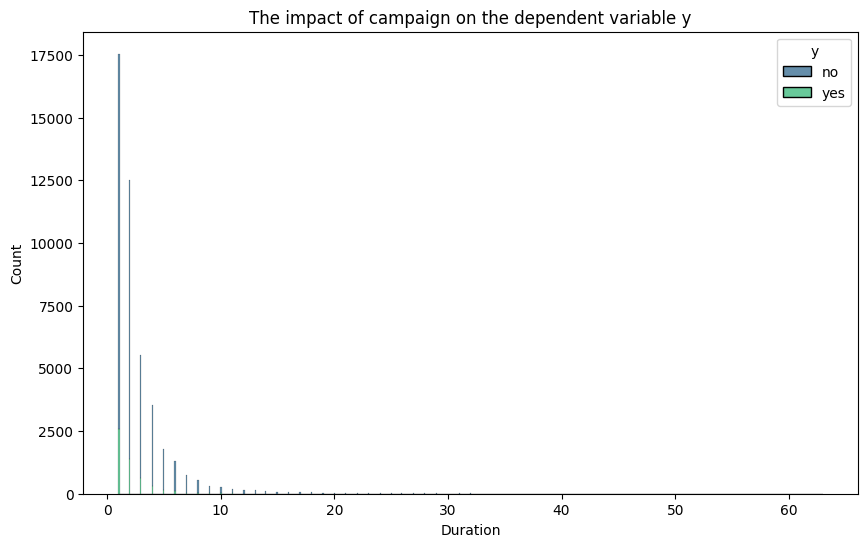

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='campaign', hue='y', multiple='stack', palette='viridis')
plt.title('The impact of campaign on the dependent variable y')
plt.xlabel('Duration')
plt.ylabel('Count')

In [32]:
df['pdays'].describe()

,pdays
count,45211.000000
mean,40.197828
std,100.128746
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,871.000000


In [33]:
df['pdays'].describe()

,pdays
count,45211.000000
mean,40.197828
std,100.128746
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,871.000000


In [34]:
df['poutcome'].value_counts()


,count
poutcome,
unknown,36959
failure,4901
other,1840
success,1511


Text(0, 0.5, 'Count')

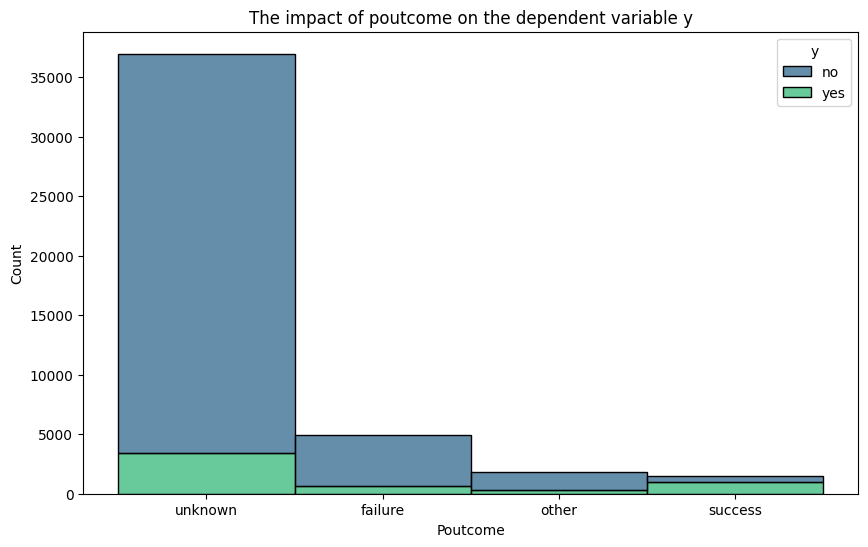

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='poutcome', hue='y', multiple='stack', palette='viridis')

plt.title('The impact of poutcome on the dependent variable y')
plt.xlabel('Poutcome')
plt.ylabel('Count')

In [36]:
df['y'].value_counts()

,count
y,
no,39922
yes,5289


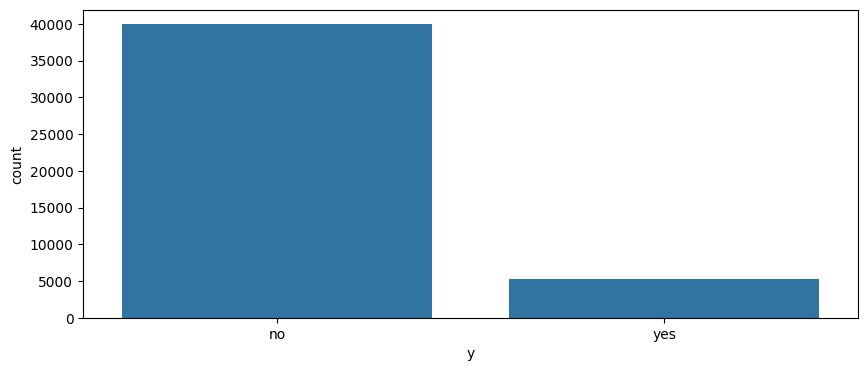

In [37]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['y'])
plt.show()

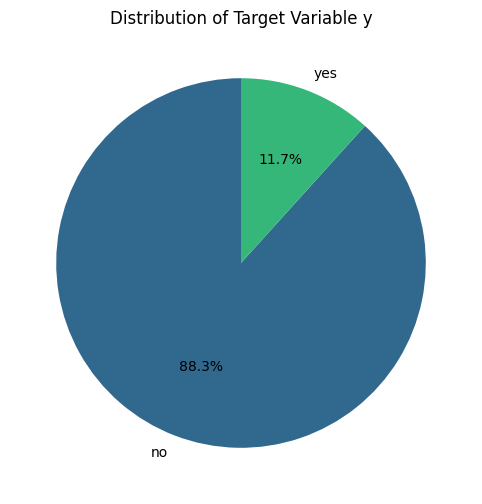

In [38]:
y_counts = df['y'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", 2), startangle=90)
plt.title('Distribution of Target Variable y')
plt.show()

In [39]:
unknown_counts = df.apply(lambda x: x[x == 'unknown'].count())
total_counts = df.shape[0]
unknown_percentage = (unknown_counts / total_counts) * 100
print(unknown_counts)

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


In [40]:
df.shape

(45211, 17)

In [41]:
df.contact.value_counts()

,count
contact,
cellular,29285
unknown,13020
telephone,2906


In [42]:
df.poutcome.value_counts()

,count
poutcome,
unknown,36959
failure,4901
other,1840
success,1511


# Data Cleaning  & Manipulation

In [43]:
#drop the unknown values in education and job
df.drop(df[df['education'] == 'unknown'].index, inplace=True)
df.drop(df[df['job'] == 'unknown'].index, inplace=True)

In [44]:
#convert the y to 0 and 1
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df['y'].value_counts()

,count
y,
0,38172
1,5021


In [45]:
df['job'] = df['job'].map({
    'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3,
    'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7,
    'student': 8, 'technician': 9, 'unemployed': 10})
df['marital'] = df['marital'].map({'married': 0, 'single': 1, 'divorced': 2})
df['education'] = df['education'].map({'primary': 0, 'secondary': 1, 'tertiary': 2})

df['default'] = df['default'].map({'no': 0, 'yes': 1})
df['housing'] = df['housing'].map({'no': 0, 'yes': 1})
df['loan'] = df['loan'].map({'no': 0, 'yes': 1})
df['contact'] = df['contact'].map({'cellular': 0, 'telephone': 1, 'unknown': 2})
df['month'] = df['month'].map({
    'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5,
    'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11
})
df['poutcome'] = df['poutcome'].map({'failure': 0, 'success': 1, 'other': 2, 'unknown': 3})

"unknown" values in the columns 'poutcome' and 'contact' will be retained!"

In [46]:
# Save the processed data to the specified path
output_path = '/content/drive/MyDrive/Bank Data/bank/bankgraph.csv'
df.to_csv(output_path, index=False)
print(f"Processed CSV saved to: {output_path}")

Processed CSV saved to: /content/drive/MyDrive/Bank Data/bank/bankgraph.csv


In [47]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,0,2,0,2143,1,0,2,5,4,261,1,-1,0,3,0
1,44,9,1,1,0,29,1,0,2,5,4,151,1,-1,0,3,0
2,33,2,0,1,0,2,1,1,2,5,4,76,1,-1,0,3,0
5,35,4,0,2,0,231,1,0,2,5,4,139,1,-1,0,3,0
6,28,4,1,2,0,447,1,1,2,5,4,217,1,-1,0,3,0


In [48]:
# Count "unknown" values for each column in the dataset
missing_values = (df == "unknown").sum()

# Display the missing values for each column
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


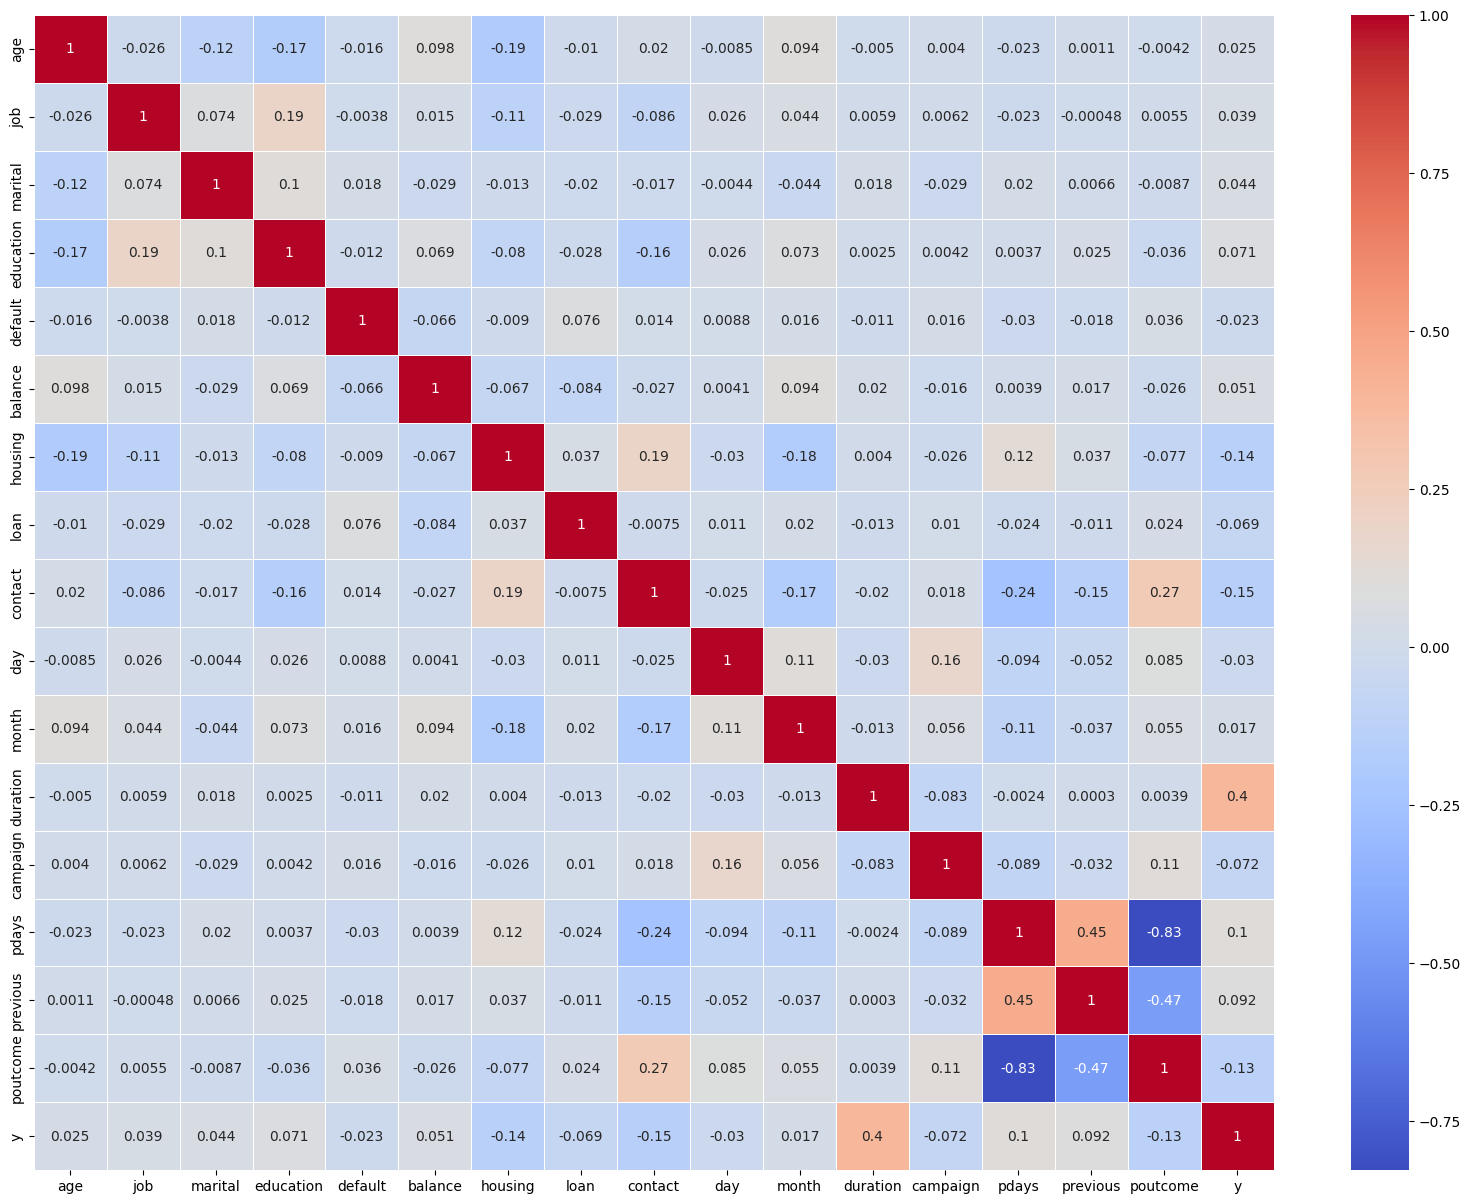

In [49]:
#correlation  matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


## EDA

1. What is the overall conversion rate of the marketing campaign (percentage of customers who subscribed)?


Total Customers: 43193
Subscribed Customers: 5021
Conversion Rate: 11.62%


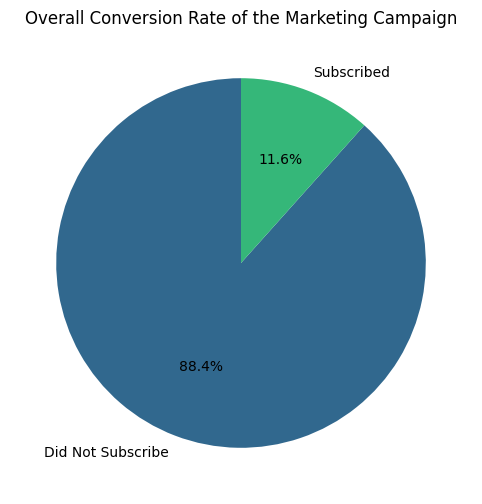

In [50]:
# Recalculate conversion rate
total_customers = len(df)
subscribed_customers = df[df['y'] == 1].shape[0]
conversion_rate = (subscribed_customers / total_customers) * 100

print(f"Total Customers: {total_customers}")
print(f"Subscribed Customers: {subscribed_customers}")
print(f"Conversion Rate: {conversion_rate:.2f}%")


# Data for the pie chart
conversion_counts = df['y'].value_counts()
labels = ['Did Not Subscribe', 'Subscribed']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(conversion_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', 2))
plt.title('Overall Conversion Rate of the Marketing Campaign')
plt.show()



2. How does the subscription rate vary across different age groups?


<ipython-input-51-b4cda326e7cb>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = df.groupby('age_group')['y'].agg(


           total_customers  subscribed_customers  subscription_rate
age_group                                                          
<25                    729                   182          24.965706
25-34                13852                  1725          12.453075
35-44                13968                  1337           9.571879
45-54                 9372                   869           9.272300
55-64                 4549                   599          13.167729
65+                    723                   309          42.738589


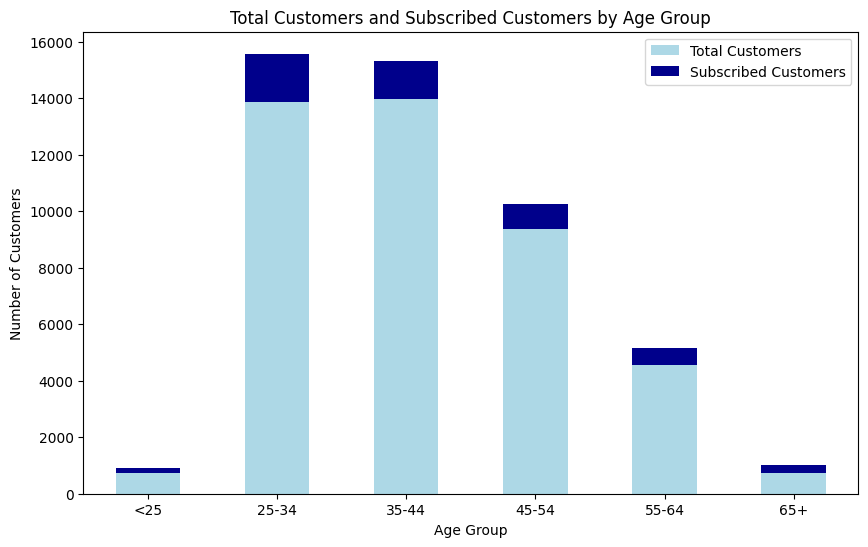

In [51]:
# Define age groups based on the unique values
bins = [0, 25, 35, 45, 55, 65, 100]  # Age ranges
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate subscription rate for each age group
age_group_summary = df.groupby('age_group')['y'].agg(
    total_customers='count',
    subscribed_customers=lambda x: (x == 1).sum()
)
age_group_summary['subscription_rate'] = (
    age_group_summary['subscribed_customers'] / age_group_summary['total_customers']
) * 100

# Display the summary
print(age_group_summary)


age_group_summary[['total_customers', 'subscribed_customers']].plot(
    kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'darkblue']
)
plt.title('Total Customers and Subscribed Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(['Total Customers', 'Subscribed Customers'])
plt.show()



3. Which job categories have the highest and lowest subscription rates?

     total_customers  subscribed_customers  subscription_rate
job                                                          
8                775                   226          29.161290
5               2145                   486          22.657343
10              1274                   198          15.541601
4               9216                  1253          13.595920
0               5000                   613          12.260000
6               1540                   182          11.818182
9               7355                   817          11.108090
3               1195                   105           8.786611
7               4004                   350           8.741259
2               1411                   116           8.221120
1               9278                   675           7.275275


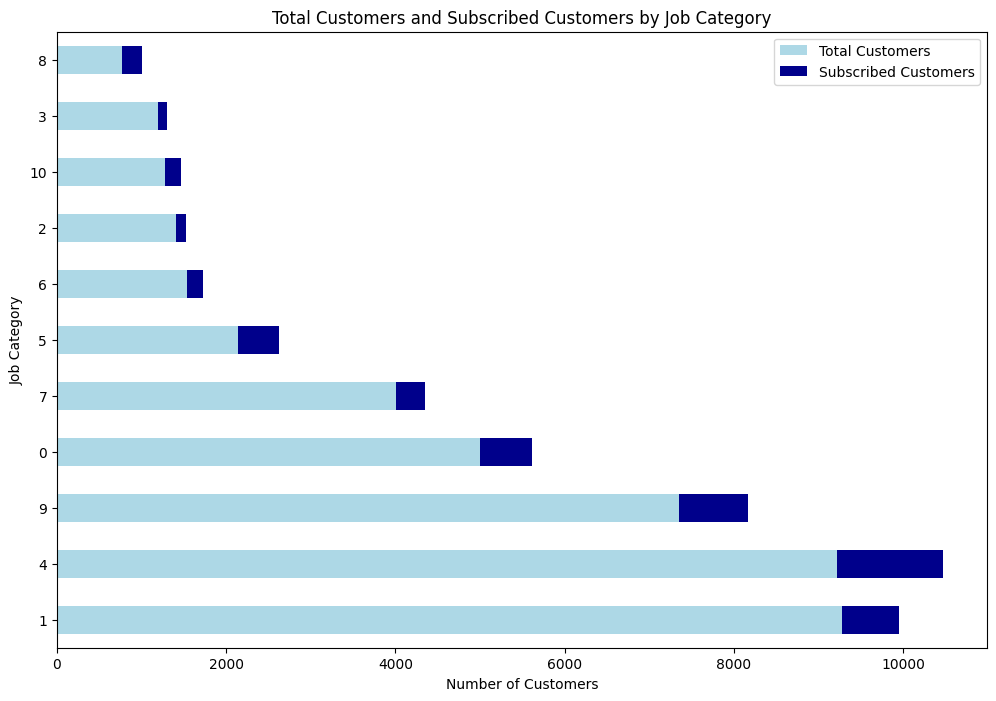

In [52]:
# Calculate subscription rate for each job category
job_performance = df.groupby('job')['y'].agg(
    total_customers='count',
    subscribed_customers=lambda x: (x == 1).sum()
)
job_performance['subscription_rate'] = (
    job_performance['subscribed_customers'] / job_performance['total_customers']
) * 100

# Sort the results by subscription rate
job_performance = job_performance.sort_values(by='subscription_rate', ascending=False)

# Display the results
print(job_performance)

# Bar chart for total and subscribed customers by job
job_performance[['total_customers', 'subscribed_customers']].sort_values(
    by='total_customers', ascending=False
).plot(
    kind='barh', figsize=(12, 8), stacked=True, color=['lightblue', 'darkblue']
)
plt.title('Total Customers and Subscribed Customers by Job Category')
plt.xlabel('Number of Customers')
plt.ylabel('Job Category')
plt.legend(['Total Customers', 'Subscribed Customers'])
plt.show()



4. How does education level affect the likelihood of subscribing?


           total_customers  subscribed_customers  subscription_rate
education                                                          
2                    13262                  1992          15.020359
1                    23131                  2441          10.552938
0                     6800                   588           8.647059


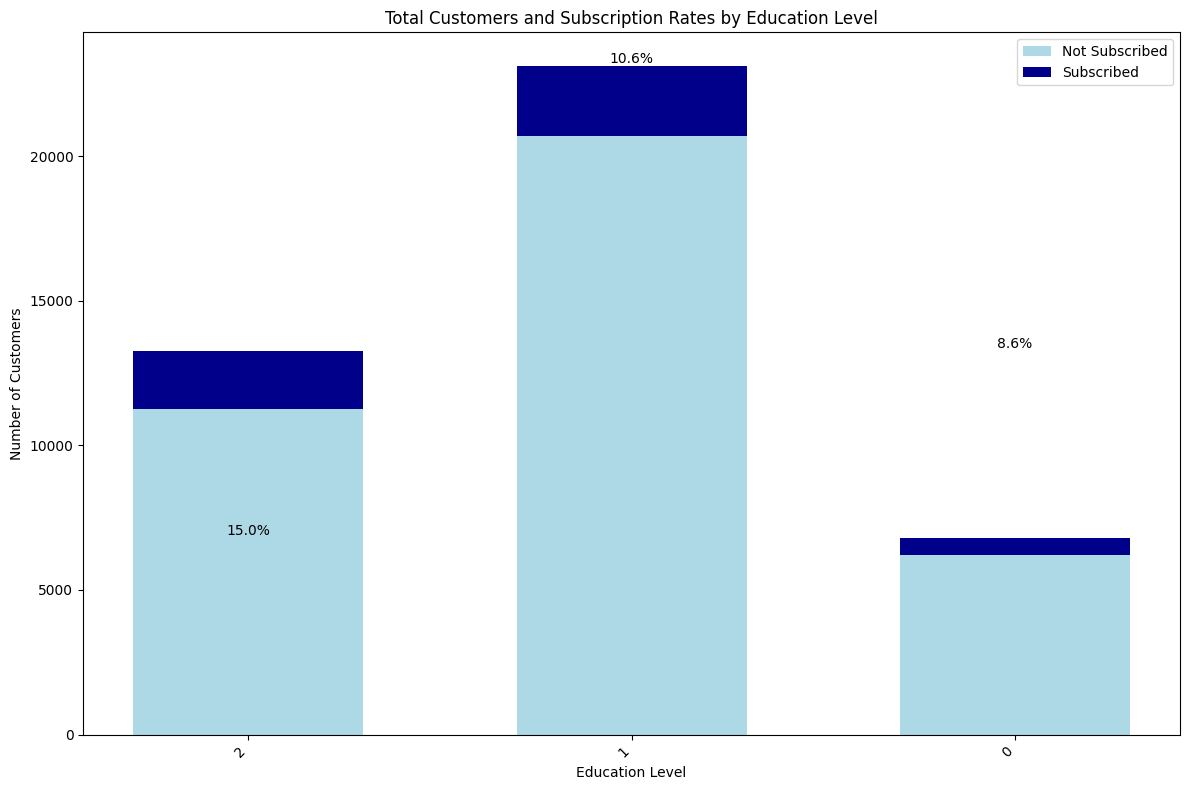

In [53]:
# Calculate subscription rate for each education level
education_performance = df.groupby('education')['y'].agg(
    total_customers='count',
    subscribed_customers=lambda x: (x == 1).sum()
)
education_performance['subscription_rate'] = (
    education_performance['subscribed_customers'] / education_performance['total_customers']
) * 100

# Sort the results by subscription rate
education_performance = education_performance.sort_values(by='subscription_rate', ascending=False)

# Display the results
print(education_performance)


# Prepare data
education_performance['not_subscribed'] = education_performance['total_customers'] - education_performance['subscribed_customers']
categories = education_performance.index
subscribed = education_performance['subscribed_customers']
not_subscribed = education_performance['not_subscribed']
subscription_rate = education_performance['subscription_rate']

# Create stacked bar chart
x = np.arange(len(categories))
width = 0.6

plt.figure(figsize=(12, 8))

# Stacked bars
plt.bar(x, not_subscribed, width, label='Not Subscribed', color='lightblue')
plt.bar(x, subscribed, width, bottom=not_subscribed, label='Subscribed', color='darkblue')

# Add subscription rate as text annotations
for i, rate in enumerate(subscription_rate):
    plt.text(x[i], not_subscribed[i] + subscribed[i] + 0.5, f'{rate:.1f}%', ha='center', va='bottom')

# Customize the plot
plt.title('Total Customers and Subscription Rates by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(x, categories, rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

5. Which contact method (cellular or telephone) is more effective for conversion?

         total_customers  subscribed_customers  subscription_rate
contact                                                          
0                  28213                  4163          14.755609
1                   2694                   350          12.991834
2                  12286                   508           4.134788


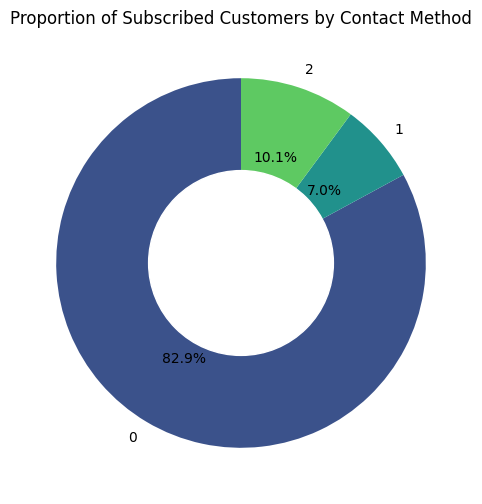

In [54]:
# Calculate subscription rate for each contact method
contact_method_performance = df.groupby('contact')['y'].agg(
    total_customers='count',
    subscribed_customers=lambda x: (x == 1).sum()
)
contact_method_performance['subscription_rate'] = (
    contact_method_performance['subscribed_customers'] / contact_method_performance['total_customers']
) * 100

# Display the results
print(contact_method_performance)

# Extract subscribed customers data
contact_subscribed = contact_method_performance['subscribed_customers'].values
labels = contact_method_performance.index

# Donut chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    contact_subscribed,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis', len(labels))
)
# Add a white circle in the center for the donut effect
plt.gca().add_artist(plt.Circle((0, 0), 0.5, color='white'))
plt.title('Proportion of Subscribed Customers by Contact Method')
plt.show()



## 6.Which months and days of the week had the highest subscription rates?


<ipython-input-55-0927e7fde848>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_performance.index, y=month_performance.values, palette="coolwarm")


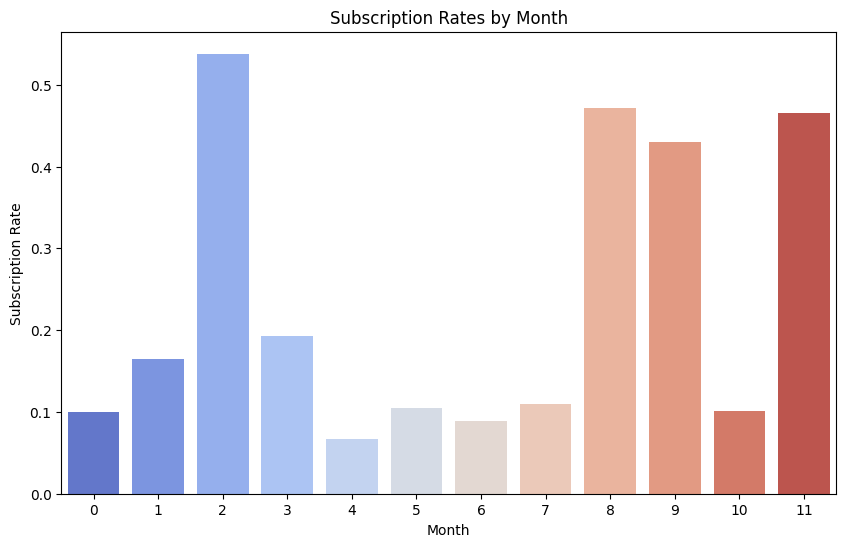

<ipython-input-55-0927e7fde848>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_performance.index, y=day_performance.values, palette="coolwarm")


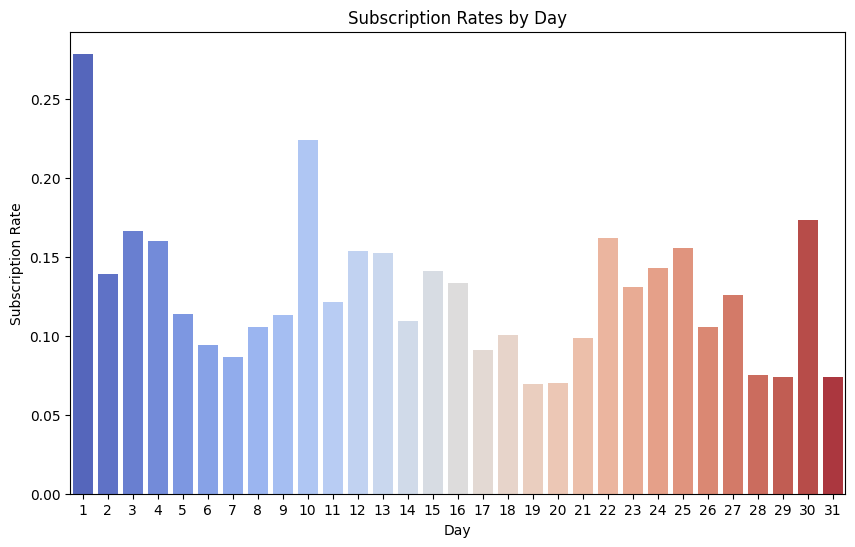

In [55]:
# Group by 'month' and calculate the subscription rate
month_performance = df.groupby('month')['y'].mean().sort_values(ascending=False)

# Visualize subscription rates by month
plt.figure(figsize=(10, 6))
sns.barplot(x=month_performance.index, y=month_performance.values, palette="coolwarm")
plt.title('Subscription Rates by Month')
plt.ylabel('Subscription Rate')
plt.xlabel('Month')
plt.show()

# Group by 'day' and calculate the subscription rate
day_performance = df.groupby('day')['y'].mean().sort_values(ascending=False)

# Visualize subscription rates by day
plt.figure(figsize=(10, 6))
sns.barplot(x=day_performance.index, y=day_performance.values, palette="coolwarm")
plt.title('Subscription Rates by Day')
plt.ylabel('Subscription Rate')
plt.xlabel('Day')
plt.show()


## 7. Does the number of previous contacts (campaign) or time since last contact (pdays) influence the likelihood of subscribing?


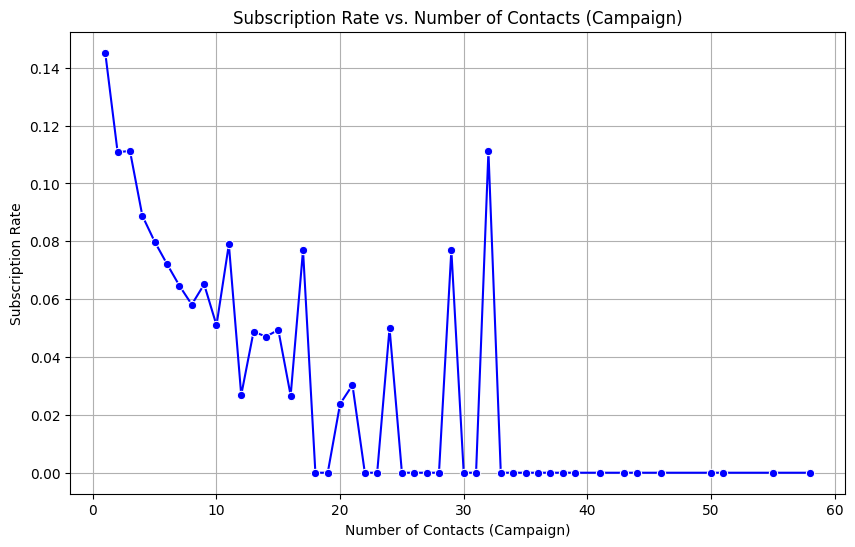

In [56]:
# Analyze the impact of 'campaign' (number of contacts)
campaign_performance = df.groupby('campaign')['y'].mean()

# Visualize subscription rate by number of contacts (campaign)
plt.figure(figsize=(10, 6))
sns.lineplot(x=campaign_performance.index, y=campaign_performance.values, marker='o', color='blue')
plt.title('Subscription Rate vs. Number of Contacts (Campaign)')
plt.ylabel('Subscription Rate')
plt.xlabel('Number of Contacts (Campaign)')
plt.grid()
plt.show()


# Choose Features & Target

In [57]:
X = df.drop('y', axis=1)
y = df['y']

Train & Test

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34554, 17) (8639, 17) (34554,) (8639,)


In [59]:
# Check for non-numeric columns in X_train
non_numeric_columns = X_train.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['age_group'], dtype='object')


In [60]:
# Apply Label Encoding to age_group
label_encoder = LabelEncoder()
X_train['age_group'] = label_encoder.fit_transform(X_train['age_group'])
X_test['age_group'] = label_encoder.transform(X_test['age_group'])

# Check the mapping
print("Age group mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Age group mapping: {'25-34': 0, '35-44': 1, '45-54': 2, '55-64': 3, '65+': 4, '<25': 5}


In [61]:
# Apply One-Hot Encoding to age_group
encoder = ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first'), ['age_group'])], remainder='passthrough')

# Transform X_train and X_test
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# LogisticRegression model

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the LogisticRegression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
logistic_regression.fit(X_train_encoded, y_train)

# Predict the target values for the test set
y_pred_lr = logistic_regression.predict(X_test_encoded)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print('Logistic Regression Accuracy:', accuracy_lr)
print('Confusion Matrix:\n', conf_matrix_lr)
print('Classification Report:\n', class_report_lr)

Logistic Regression Accuracy: 0.892927422155342
Confusion Matrix:
 [[7508  150]
 [ 775  206]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7658
           1       0.58      0.21      0.31       981

    accuracy                           0.89      8639
   macro avg       0.74      0.60      0.63      8639
weighted avg       0.87      0.89      0.87      8639



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# xgboost model

In [63]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:23:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9127213797893274
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7658
           1       0.65      0.50      0.57       981

    accuracy                           0.91      8639
   macro avg       0.79      0.73      0.76      8639
weighted avg       0.91      0.91      0.91      8639



# Random Forest Classifier model

In [64]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred_rf = model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_accuracy

0.9062391480495428

# Conclusion

In [66]:
# Logistic Regression
print('Logistic Regression Classification Report:\n', class_report_lr)

# Random Forest Classifier
rf_class_report = classification_report(y_test, y_pred_rf)
print('Random Forest Classifier Classification Report:\n', rf_class_report)

# XGBoost Classifier
xgb_class_report = classification_report(y_test, y_pred)
print('XGBoost Classifier Classification Report:\n', xgb_class_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7658
           1       0.58      0.21      0.31       981

    accuracy                           0.89      8639
   macro avg       0.74      0.60      0.63      8639
weighted avg       0.87      0.89      0.87      8639

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7658
           1       0.64      0.40      0.49       981

    accuracy                           0.91      8639
   macro avg       0.78      0.69      0.72      8639
weighted avg       0.89      0.91      0.90      8639

XGBoost Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7658
           1       0.65      0.50      0.57       981

    accuracy                           0.91   

## Hyperparameter Tuning

In [67]:
import joblib

# Serialize the trained XGBoost model
joblib.dump(xgb_model, 'xgboost_model.pkl')
print("Model serialized and saved as 'xgboost_model.pkl'")


Model serialized and saved as 'xgboost_model.pkl'


In [68]:
import pandas as pd
import joblib

# Load the serialized model
model = joblib.load('xgboost_model.pkl')

# Load the input data
input_data = pd.read_csv('/content/drive/MyDrive/Bank Data/bank/bank.csv', delimiter=';')

# Add the 'age_group' feature if not already in the dataset
if 'age_group' not in input_data.columns:
    def categorize_age(age):
        if age < 30:
            return 'young'
        elif age <= 60:
            return 'middle-aged'
        else:
            return 'senior'
    input_data['age_group'] = input_data['age'].apply(categorize_age)

# Ensure input features match the training dataset
features = [
    'age', 'job', 'marital', 'education', 'default',
    'balance', 'housing', 'loan', 'contact', 'day',
    'month', 'duration', 'campaign', 'pdays', 'previous',
    'poutcome', 'age_group'
]

# Load the training data's feature names (used during model training)
training_features = model.get_booster().feature_names

# Encode categorical columns in the test data
categorical_columns = input_data[features].select_dtypes(include=['object']).columns
input_data_encoded = pd.get_dummies(input_data[features], columns=categorical_columns)

# Align test features with the training features
missing_features = set(training_features) - set(input_data_encoded.columns)
for feature in missing_features:
    input_data_encoded[feature] = 0  # Add missing columns with default value 0

# Ensure columns are in the same order as the training features
input_data_encoded = input_data_encoded[training_features]

# Generate predictions
predictions = model.predict(input_data_encoded)

# Save predictions to a CSV file
output = input_data.copy()
output['Prediction'] = predictions
output.to_csv('/content/drive/MyDrive/Bank Data/bank/predictions_output.csv', index=False)

print("Predictions saved to '/content/drive/MyDrive/Bank Data/bank/predictions_output.csv'")


Predictions saved to '/content/drive/MyDrive/Bank Data/bank/predictions_output.csv'


In [69]:
!pip install gradio

In [82]:
import gradio as gr
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = joblib.load('xgboost_model.pkl')

# Load the dataset
data_path = '/content/drive/MyDrive/Bank Data/bank/bankgraph.csv'
df = pd.read_csv(data_path, delimiter=',')

# Prediction function
def predict_customer_subscription(
    age, job, marital, education, default, balance, housing, loan, contact, day,
    month, duration, campaign, pdays, previous, poutcome, age_group
):
    # Create a single-row input DataFrame
    input_data = {
        'age': [age],
        'job': [job],
        'marital': [marital],
        'education': [education],
        'default': [default],
        'balance': [balance],
        'housing': [housing],
        'loan': [loan],
        'contact': [contact],
        'day': [day],
        'month': [month],
        'duration': [duration],
        'campaign': [campaign],
        'pdays': [pdays],
        'previous': [previous],
        'poutcome': [poutcome],
        'age_group': [age_group],
    }
    input_df = pd.DataFrame(input_data)
    categorical_columns = input_df.select_dtypes(include=['object']).columns
    input_encoded = pd.get_dummies(input_df, columns=categorical_columns)

    # Align with model's training features
    training_features = model.get_booster().feature_names
    missing_features = set(training_features) - set(input_encoded.columns)
    for feature in missing_features:
        input_encoded[feature] = 0  # Add missing columns with default value 0
    input_encoded = input_encoded[training_features]

    # Generate prediction
    prediction = model.predict(input_encoded)[0]
    result_text = "1: Likely to subscribe to the term deposit." if prediction == 1 else "0: Likely not subscribing to the term deposit."
    return result_text

# Graphs for Prediction Tab
def conversion_rate_graph():
    total_customers = len(df)
    subscribed_customers = df[df['y'] == 1].shape[0]
    conversion_counts = df['y'].value_counts()
    labels = ['Did Not Subscribe', 'Subscribed']

    plt.figure(figsize=(8, 6))
    plt.pie(conversion_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', 2))
    plt.title(f'Overall Conversion Rate: {subscribed_customers / total_customers:.2%}')
    plt.tight_layout()
    return plt

def age_group_graph():
    bins = [0, 25, 35, 45, 55, 65, 100]
    labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    age_group_summary = df.groupby('age_group')['y'].agg(
        total_customers='count',
        subscribed_customers=lambda x: (x == 1).sum()
    )
    age_group_summary[['total_customers', 'subscribed_customers']].plot(
        kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'darkblue']
    )
    plt.title('Total Customers and Subscribed Customers by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=0)
    plt.tight_layout()
    return plt

def contact_method_graph():
    contact_method_performance = df.groupby('contact')['y'].agg(
        total_customers='count',
        subscribed_customers=lambda x: (x == 1).sum()
    )

    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(
        contact_method_performance['subscribed_customers'],
        labels=contact_method_performance.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('viridis', len(contact_method_performance.index))
    )
    plt.gca().add_artist(plt.Circle((0, 0), 0.5, color='white'))
    plt.title('Proportion of Subscribed Customers by Contact Method')
    plt.tight_layout()
    return plt

def education_graph():
    education_performance = df.groupby('education')['y'].agg(
        total_customers='count',
        subscribed_customers=lambda x: (x == 1).sum()
    )
    education_performance['not_subscribed'] = education_performance['total_customers'] - education_performance['subscribed_customers']
    categories = education_performance.index
    subscribed = education_performance['subscribed_customers']
    not_subscribed = education_performance['not_subscribed']

    x = range(len(categories))
    plt.figure(figsize=(12, 8))
    plt.bar(x, not_subscribed, label='Not Subscribed', color='lightblue')
    plt.bar(x, subscribed, bottom=not_subscribed, label='Subscribed', color='darkblue')

    for i, rate in enumerate((subscribed / education_performance['total_customers']) * 100):
        plt.text(x[i], not_subscribed[i] + subscribed[i] + 0.5, f'{rate:.1f}%', ha='center', va='bottom')

    plt.title('Total Customers and Subscription Rates by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Number of Customers')
    plt.xticks(x, categories, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    return plt

# Gradio Interface
with gr.Blocks() as demo:
    gr.Markdown("## Customer Subscription Prediction")
    gr.Markdown(
        "Provide the customer details below to predict whether they will subscribe to a term deposit."
    )
    gr.Markdown(
        "Age Group Explanation:<br>"
        "**young**: Age < 30<br>"
        "**middle-aged**: Age 30-60<br>"
        "**senior**: Age > 60<br>"
        "Prediction Explanation:<br>"
        "0: Likely not subscribing to the term deposit.<br>"
        "1: Likely to subscribe to the term deposit."
    )

    with gr.Tab("Prediction"):
        with gr.Row():
            age = gr.Number(label="Age")
            job = gr.Textbox(label="Job")
            marital = gr.Textbox(label="Marital Status")
            education = gr.Textbox(label="Education")
        with gr.Row():
            default = gr.Textbox(label="Default")
            balance = gr.Number(label="Balance")
            housing = gr.Textbox(label="Housing Loan")
            loan = gr.Textbox(label="Personal Loan")
        with gr.Row():
            contact = gr.Textbox(label="Contact")
            day = gr.Number(label="Last Contact Day")
            month = gr.Textbox(label="Month")
            duration = gr.Number(label="Duration")
        with gr.Row():
            campaign = gr.Number(label="Campaigns")
            pdays = gr.Number(label="Days Since Last Contact")
            previous = gr.Number(label="Previous Contacts")
            poutcome = gr.Textbox(label="Previous Outcome")
        age_group = gr.Textbox(label="Age Group")
        predict_button = gr.Button("Predict")
        output = gr.Textbox(label="Prediction")
        predict_button.click(
            predict_customer_subscription,
            inputs=[age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, age_group],
            outputs=output
        )

        # Add graphs to the Prediction tab
        gr.Markdown("### Insights")
        gr.Markdown("#### Conversion Rate")
        gr.Plot(conversion_rate_graph)

        gr.Markdown("#### Age Group Analysis")
        gr.Plot(age_group_graph)

        gr.Markdown("#### Contact Method Analysis")
        gr.Plot(contact_method_graph)

        gr.Markdown("#### Education Level Analysis")
        gr.Plot(education_graph)

# Launch the app
demo.launch()


<ipython-input-82-d2344608fed3>:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = df.groupby('age_group')['y'].agg(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4b1a5ab40c9768115c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## APP URL

https://sheryar1998-predictions-in-bank-marketing.hf.space